#**참고한 자료들의 분석 방식 개요**

##아이펠 노드

  - EDA
    - train set 확인
    - train set 데이터타입 확인
    - 결측치 확인
    - 가격 히스토그램
    - 가격 기술통계량
    - host_id value_counts()
  - 데이터 전처리
    - 결측치 삭제 및 교체
    - int64 자료형으로 된 컬럼만 남기기
  - 검증 데이터 분리
    - train 데이터에서 validation 데이터 분리
  - 머신러닝 (model 변수에 각 머신 러닝 모델들 할당하기)
    - 선형회귀
    - 릿지 회귀
    - 라쏘 회귀
    - 엘라스틱넷 회귀
    - 랜덤포레스트
    - xgboost
  - 채점

## Airbnb Analysis, Visualization and Prediction
https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction

  - Importing Libraries
  - Loading the dataset
  - 데이터 전처리:
    - 필요없는 값 제거
    - 중복값 제거
    - 결측치 제거 및 교체
  - Data Visualization: Using plots to find relations between the features.
    - 상관관계 분석
    - Neighbourhood Group 시각화(group 별 countplot, neighbourhood 전체 시각화)
    - Room Type 시각화(유형 별 countplot)
    - Relation between neighbourgroup and Availability of Room (boxplot)
    - Map of Neighbourhood group (위도, 경도를 활용한 산점도)
    - Map of Neighbourhood (산점도를 방 유형으로 hue)
    - Availabity of room (산점도를 1년 내 이용 가능일로 hue)
    - Word Cloud (neighbourhood 값 별로 빈도 나타냄)
  - Regression Analysis (컬럼은 neighbourhood_group	room_type	price	minimum_nights	calculated_host_listings_count	availability_365, 총 6개만 남김, neighbourhood_group과 room_type은 인코딩함)
    - Linear Regression
    - Decision Tree Regression
    - Random Forest Regression

## 아이펠 성능 향상 팁 (아래 Airbnb NYC Price Prediction 기반의 내용)

- 데이터 전처리
  - 가격에 로그를 적용하면 분포가 정규 분포처럼 바뀐다.
  - 수치형 데이터와 범주형 데이터 분리
  - 수치형은 minmax로, 범주형은 labelencoding

## Airbnb NYC Price Prediction

https://www.kaggle.com/code/duygut/airbnb-nyc-price-prediction/notebook

- 가격 로그 씌우기
  - The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

    Since division by zero is a problem, log+1 transformation would be better.

- 상관관계 분석 해석
  - The correlation table shows that there is no strong relationship between price and other features. This indicates no feature needed to be taken out of data. This relationship will be detailed with Residual Plots and Multicollinearity.
- Residual Plots
  - Residual Plot is strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price.

    An ideal Residual Plot, the red line would be horizontal. Based on the below charts, most features are non-linear. On the other hand, there are not many outliers in each feature. This result led to underfitting. Underfitting can occur when input features do not have a strong relationship to target variables or over-regularized. For avoiding underfitting new data features can be added or regularization weight could be reduced.

    In this kernel, since the input feature data could not be increased, Regularized Linear Models will be used for regularization and polynomial transformation will be made to avoid underfitting.

- Multicollinearity
  - Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

    In this kernel, multicollinearity will be control with Eigen vector values results.

    None one of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity exists in the data.
- 속성 선택을 위해 feature_importance graph 그리기
  - StandardScaler로 표준화
  - Extra Trees Classifier 로 속성의 중요도 확인하기 (feature_importances_ 메소드 활용)
  - 전부 포함한 것, 가장 중요도가 낮은 두 속성 제외한 것, 총 두 가지로 모델링을 진행한다.
- K Fold validation 해준다.
- grid search CV로 각 모델의 최적의 파라미터를 찾아주고 하이퍼파라미터를 튜닝해준다.


# IMPORT

In [1]:
# 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/airbnb_nyc_2019/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/airbnb_nyc_2019/test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/airbnb_nyc_2019/y_test.csv')

# EDA

In [3]:
train.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0


In [4]:
test.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365


In [5]:
#데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [6]:
#dtype 확인. train.dtypes로도 가능
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [7]:
#price가 정답인지라 test data에선 price 열이 빠진 모습
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9775 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9775 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  last_review                     7721 non-null   object 
 12  reviews_per_month               77

In [8]:
#결측치 확인
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
#중복치 확인
train.duplicated().sum()

0

# 데이터 전처리, 추가 EDA

<Axes: >

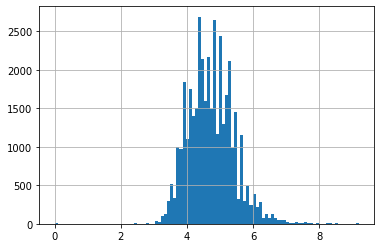

In [10]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [11]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [12]:
train.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,28,0,NaN,NaN,1,0
5,15523281,1 bedroom to yourself in Midtown Manhattan!,96595601,Tristan,Manhattan,Midtown,40.75966,-73.96313,Entire home/apt,3,21,2019-05-12,0.67,1,0
6,8843681,LARGE 2 BEDROOM DUPLEX WITH YARD,14104350,Irving,Brooklyn,Bedford-Stuyvesant,40.68363,-73.94142,Entire home/apt,5,28,2019-07-08,0.70,2,347
7,916311,Rooms in Spacious East Village Apt.,511175,Luis,Manhattan,East Village,40.72361,-73.97877,Private room,3,5,2017-02-19,0.08,2,31
8,33457731,Room available in BedStuy condo w/ private yard,35528708,Cindy,Brooklyn,Bedford-Stuyvesant,40.69615,-73.94740,Private room,1,4,2019-06-08,1.20,2,0
9,29936587,Bright and stylish bedroom 20min from Times Sq...,140930693,Max And Kathy,Bronx,Mott Haven,40.81167,-73.92729,Private room,1,38,2019-06-21,4.75,2,301


In [13]:
#필요없는 열 제거
train.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [14]:
test.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [15]:
train.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
train.reviews_per_month.isnull().sum()

0

In [16]:
test.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
test.reviews_per_month.isnull().sum()

0

In [17]:
# object 열 인코딩
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

train_en = Encode(train.copy())
test_en = Encode(test.copy())

In [18]:
train_en.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,94219511,0,Harlem,40.80167,-73.95781,0,3,3,0.09,2,0
1,49015331,0,Hell's Kitchen,40.76037,-73.99016,1,2,64,1.68,2,262
2,440022,0,West Village,40.73001,-74.00562,1,60,1,0.20,1,0
3,3577509,1,Bedford-Stuyvesant,40.69128,-73.93653,1,4,239,2.89,2,1
4,12475280,1,Bedford-Stuyvesant,40.68899,-73.95555,0,28,0,0.00,1,0


In [19]:
train_en.drop(['neighbourhood'], axis=1, inplace=True)
test_en.drop(['neighbourhood'], axis=1, inplace=True)

# 머신 러닝

In [20]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_en, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 10), (7824, 10), (31292,), (7824,))

In [21]:
#선형 회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
model1.fit(X_train, y_train)
pred = model1.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val,pred)

16054.639503347562

In [22]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model2 = Ridge()
model2.fit(X_train, y_train)
pred = model2.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.6254e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


16044.712389298353

In [23]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model3 = Lasso()
model3.fit(X_train, y_train)
pred = model3.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

11987.087398391046

In [24]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model4 = ElasticNet()
model4.fit(X_train, y_train)
pred = model4.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

12103.035552191373

In [25]:
# Xgboost
from xgboost import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
model5 = XGBRegressor(random_state=2022)
model5.fit(X_train, y_train,)

pred = model5.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)

22934.750667145076

In [26]:
#최적 파라미터 찾기
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# grid = GridSearchCV(estimator=model5, 
#                    param_grid=parameters,
#                    scoring='neg_mean_squared_error', 
#                    cv = 2,
#                     n_jobs = 5,
#                     verbose=1)

# grid.fit(X_train, y_train)

# print("Best parameters:", grid.best_params_)

In [27]:
# import sklearn as sklearn
# sklearn.metrics.get_scorer_names()

In [28]:
#파라미터 튜닝 적용 - 테스트 결과는 안 좋음
# model5 = XGBRegressor(random_state=2022,
#             colsample_bytree =0.7,
#            learning_rate = 0.03,
#            max_depth = 7,
#            min_child_weight = 4,
#            n_estimators = 500,
#            nthread =4,
#            objective = 'reg:linear',
#            silent = 1,
#            subsample = 0.7)
# model5.fit(X_train, y_train,)
# pred = model5.predict(X_val)
# pred = np.expm1(pred)
# mean_squared_error(y_val, pred)

# #기존 값은 22934.750667145076
# #파라미터 튜닝 후 21569.469251845432

In [29]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model6 = RandomForestRegressor(random_state=2022)
model6.fit(X_train, y_train)
pred = model6.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

23217.151328530475

# 채점

In [30]:
#채점(xgboost)

pred = model5.predict(test_en)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)
#기존 43761.91279661493
#xgboost파라미터 수정 후 44727.62915035917..? 기각!

43761.91279661493